In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy
from datetime import datetime,timedelta
from xmovie import Movie
import nfft
import xrft

%matplotlib inline

In [2]:
data = pd.read_excel('/Users/2311043/Documents/Dongji2013.xlsx').to_xarray()

data = data.assign_coords({'index':data.Date}).drop('Date').rename({'index':'time'})

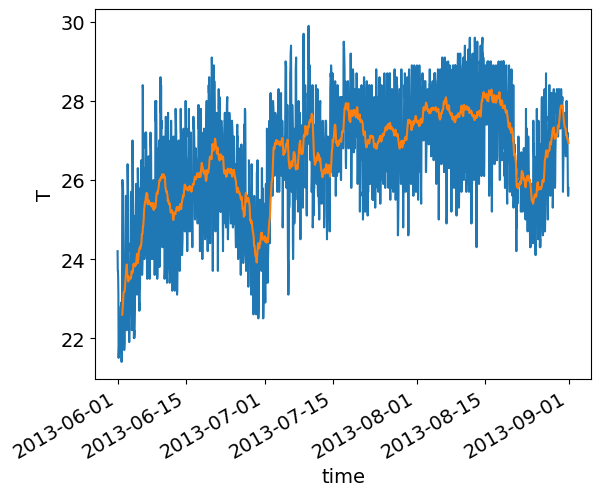

In [3]:
data.T.plot()
smoothed = data.T.rolling(time=24).mean()
smoothed = smoothed[~np.isnan(smoothed)]
smoothed.plot()

In [4]:
data_hann = (data.T - data.T.mean(dim='time')) * np.hanning(len(data.T))

In [5]:
ps_xrft = xrft.power_spectrum(data.T - data.T.mean(dim='time'))
ps_xrft_hann = xrft.power_spectrum(data_hann)

ps_xrft = ps_xrft.assign_coords({'freq_time':ps_xrft.freq_time*3600*24})
ps_xrft_hann = ps_xrft_hann.assign_coords({'freq_time':ps_xrft_hann.freq_time*3600*24})

(0.1, 10000000.0)

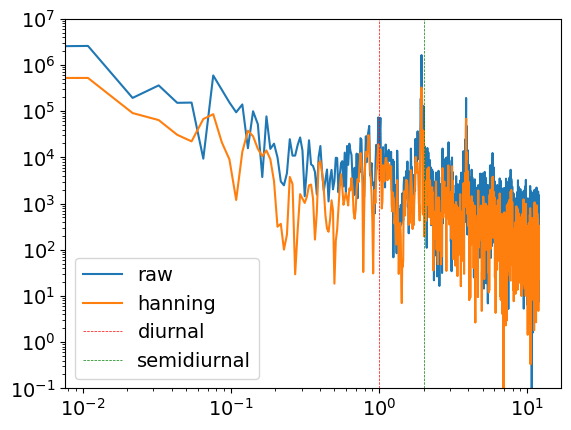

In [6]:
plt.loglog(ps_xrft.freq_time,ps_xrft,label='raw')
plt.loglog(ps_xrft_hann.freq_time,ps_xrft_hann,label='hanning')

ymin,ymax = 1e-1,1e7
plt.vlines(1,ymin,ymax,color='r',linestyle='--',linewidth=0.5,label='diurnal')
plt.vlines(2,ymin,ymax,color='g',linestyle='--',linewidth=0.5,label='semidiurnal')

plt.legend()
plt.ylim([ymin,ymax])